In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

In [3]:
def clean_data(df):
    df.dropna(inplace=True)
    
    for column in df.columns[:-1]:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
    df.dropna(inplace=True)
    
    return df

In [4]:
def kmeansGMM(scaled_data, kk, kb):
    kmeans_inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        kmeans_inertia.append(kmeans.inertia_)
        
    plt.plot(range(1, 11), kmeans_inertia, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Within-cluster sum of squares (Inertia)')
    plt.title('Elbow Method for Optimal K')
    plt.show()
    
    bic_scores = []
    for k in range(1, 11):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(scaled_data)
        bic_scores.append(gmm.bic(scaled_data))
        
    plt.plot(range(1, 11), bic_scores, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('BIC Score')
    plt.title('BIC Score for Optimal K (GMM)')
    plt.show()
        
    diffs = np.diff(kmeans_inertia)
    acceleration = diffs[1:] - diffs[:-1]
    # optimal_k = np.argmax(acceleration) + 2
    
    print(f"Optimal K for Kmeans: {kk}")
    
    diffs = np.diff(bic_scores)
    acceleration = diffs[1:] - diffs[:-1]
    # optimal_Kb = np.argmax(acceleration) + 2
    
    print(f"Optimal K for GMM: {kb}")
    
    kmeans = KMeans(n_clusters=kk, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    
    gmm = GaussianMixture(n_components=kb, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_data)
    
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title('K-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.colorbar(label='Cluster Number')
    plt.show()
    
    for i in range(len(gmm.means_)):
        probs = gmm.predict_proba(scaled_data)
        plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=probs[:, i], cmap='viridis', alpha=0.8)
        plt.colorbar(label='Probability')
        plt.title(f'GMM Clustering Cluster {i+1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        plt.tight_layout()
        plt.show()

## Air Foil
___

In [5]:
columns = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pressure level']

df = pd.read_csv('./datas/airfoil.dat', delimiter='\t', header=None, names=columns)

airFoilDataScaled = scaler.fit_transform(df)


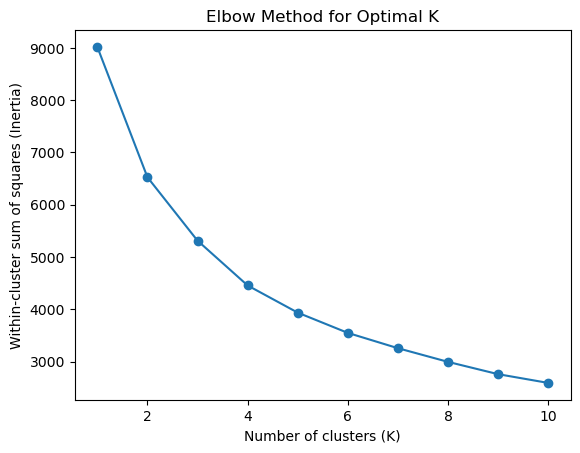

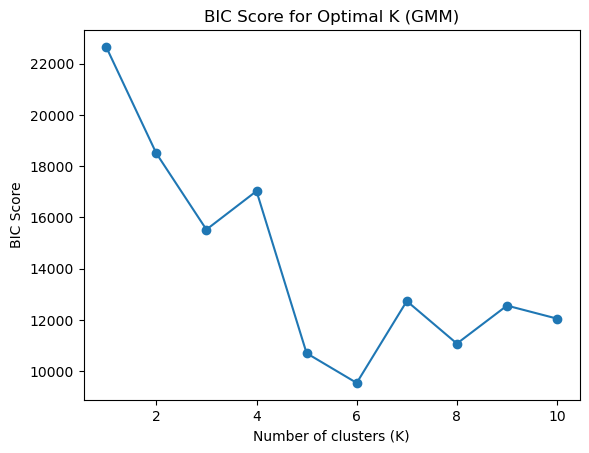

Optimal K for Kmeans: 6
Optimal K for GMM: 6


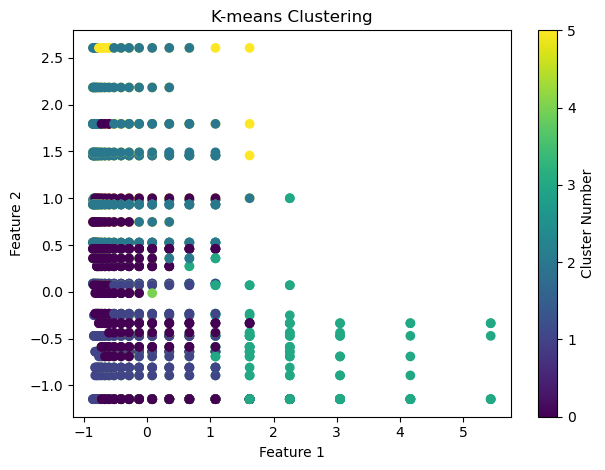

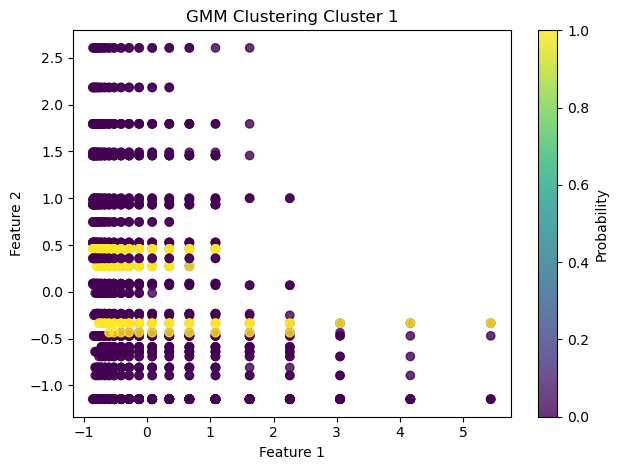

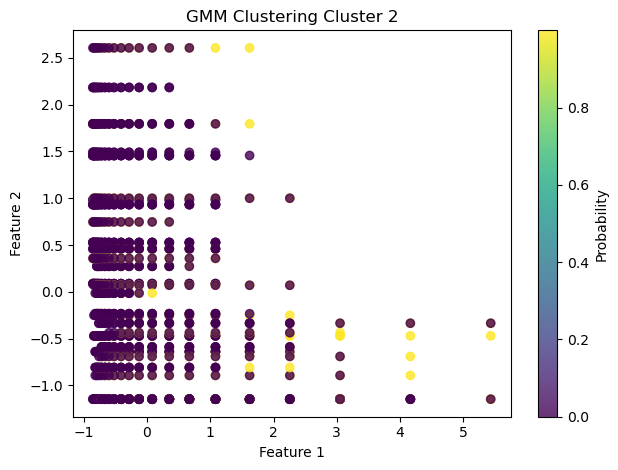

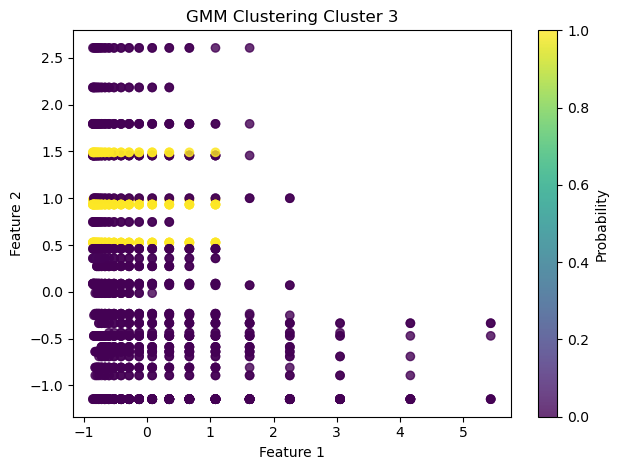

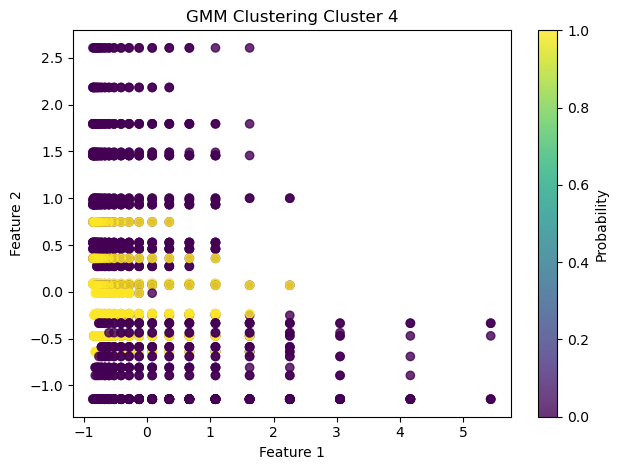

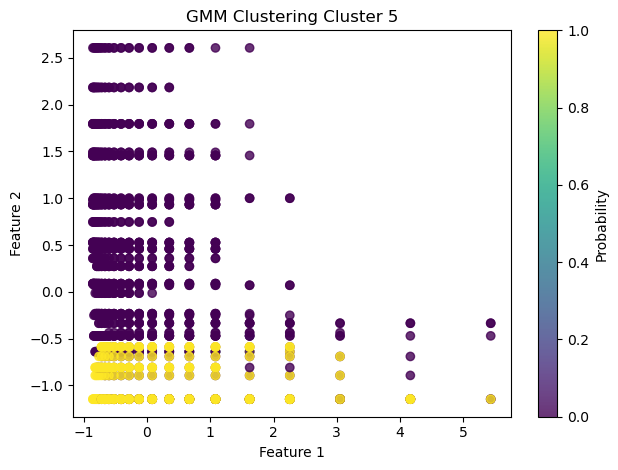

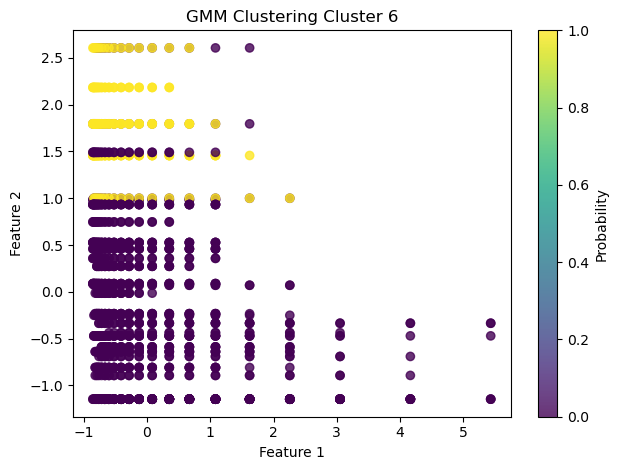

In [6]:
kmeansGMM(airFoilDataScaled, 6, 6)

## Breast Cancer
___

In [7]:
columns = ['ID', 'Outcome'] + [f'Feature_{i}' for i in range(1, 33)]
df = pd.read_csv('./datas/breastCancer.data', header=None, names=columns, na_values=['?'])

df.dropna(inplace=True)
id_encoded = encoder.fit_transform(df[['ID']]).toarray()

scaled_data = scaler.fit_transform(df.drop(columns=['ID']))

scaled_data = np.concatenate([scaled_data, id_encoded], axis=1)

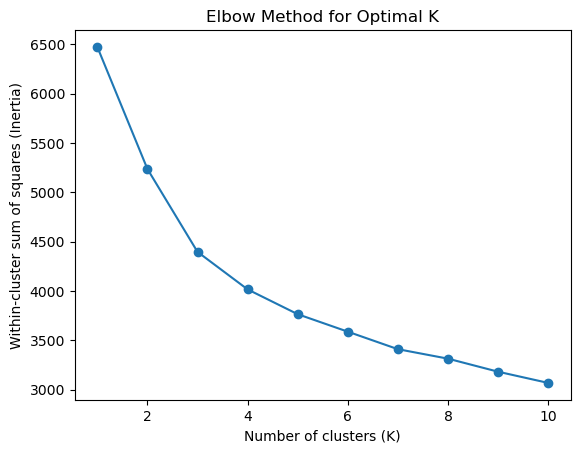

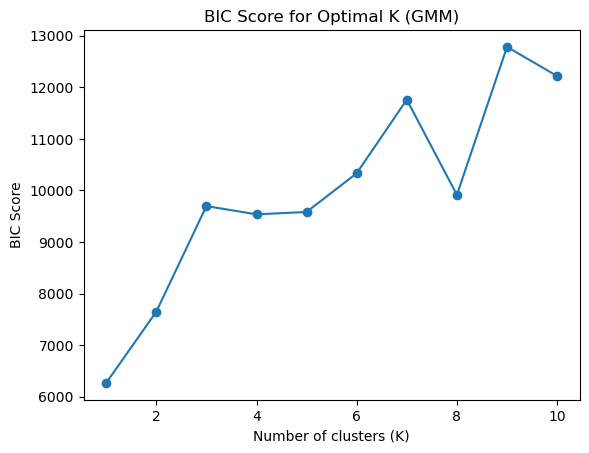

Optimal K for Kmeans: 4
Optimal K for GMM: 2


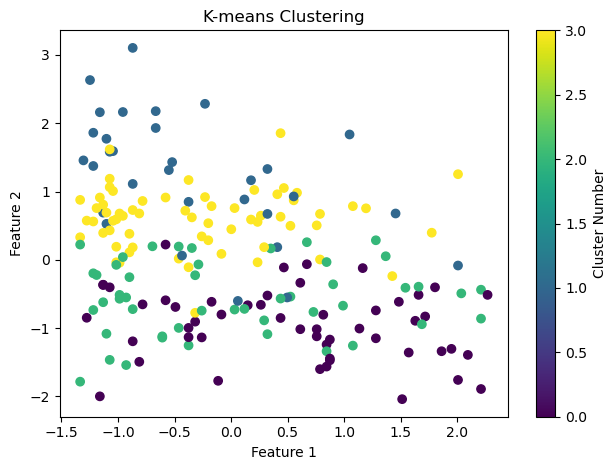

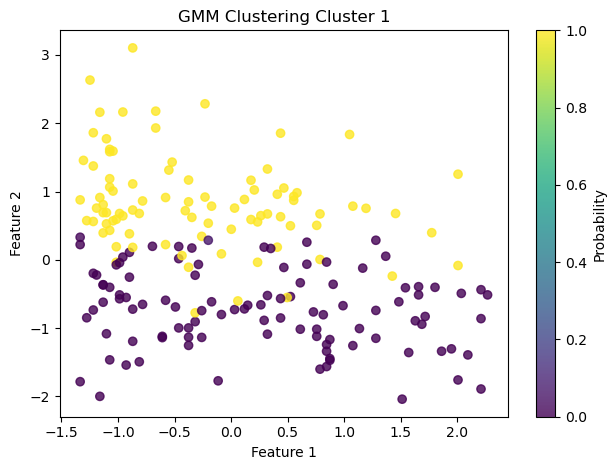

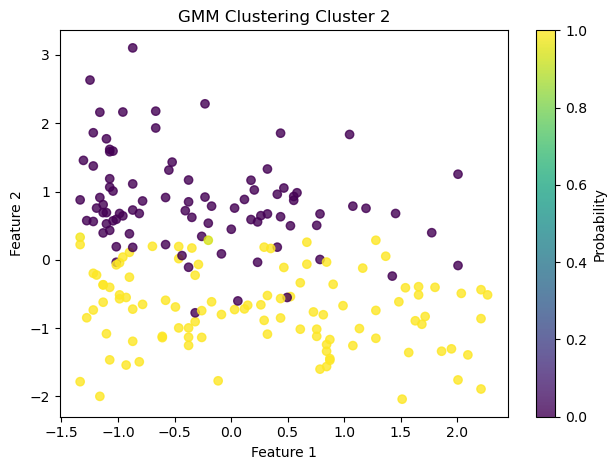

In [8]:
kmeansGMM(scaled_data, 4, 2)

## Concrete slump
___

In [9]:
df = pd.read_csv('./datas/slump_test.data')
X = df.iloc[:, :7]

scaled_data = scaler.fit_transform(X)

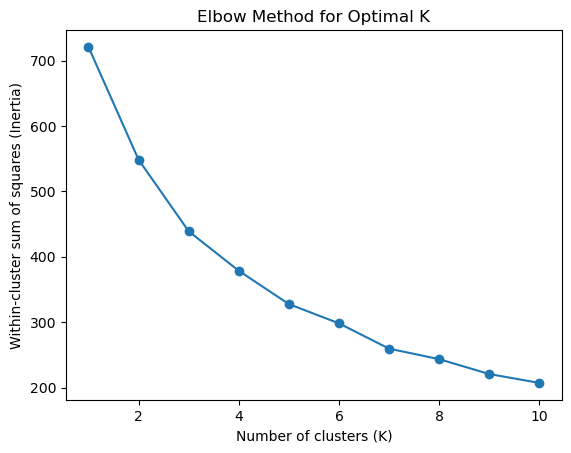

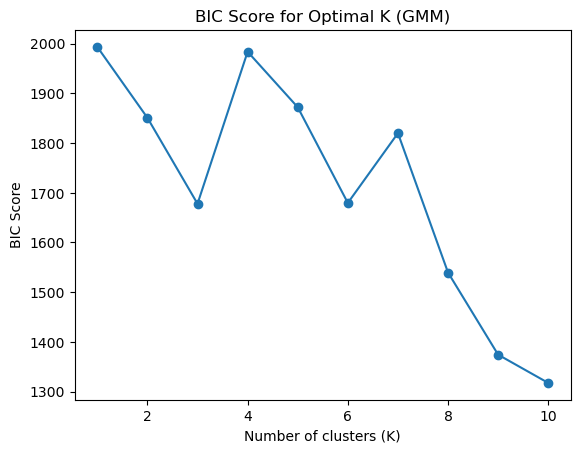

Optimal K for Kmeans: 5
Optimal K for GMM: 10


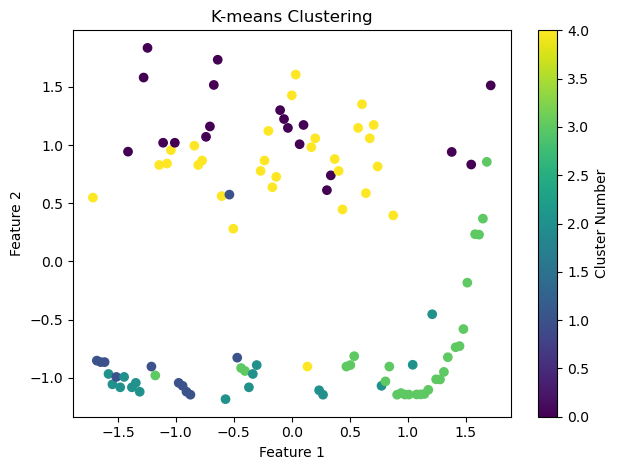

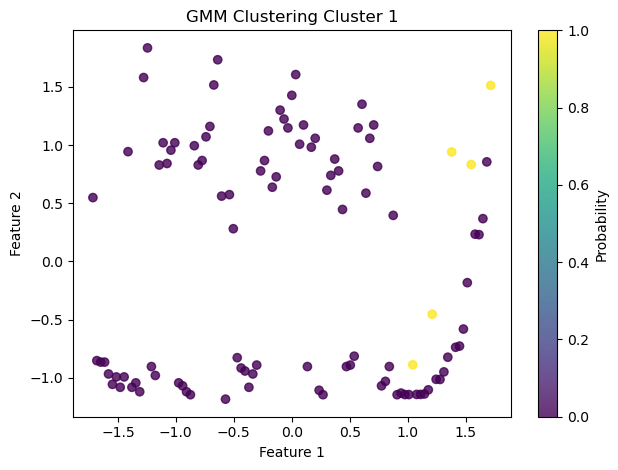

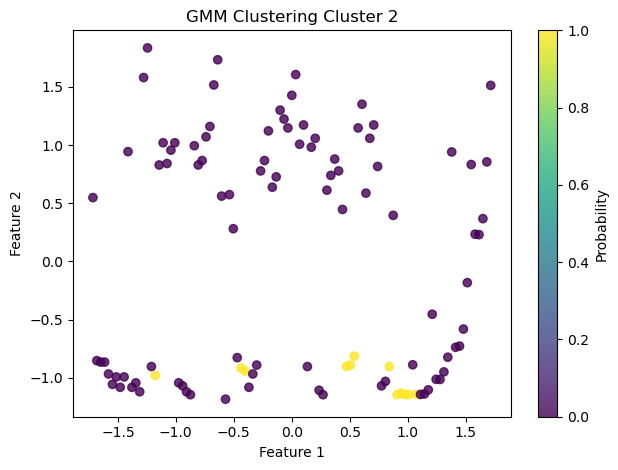

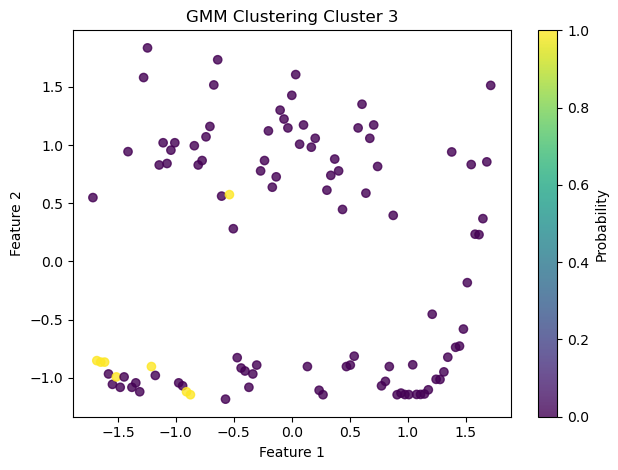

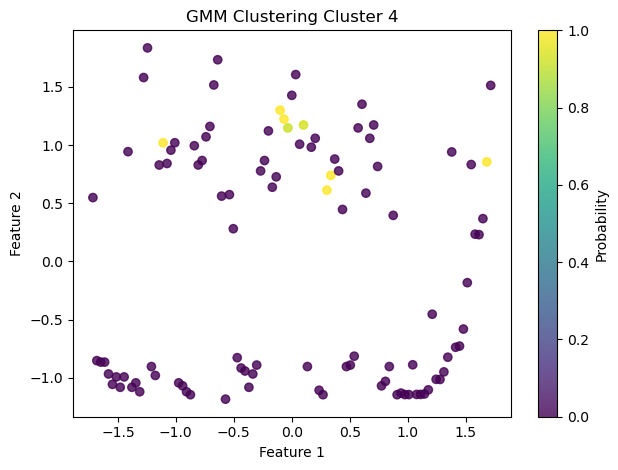

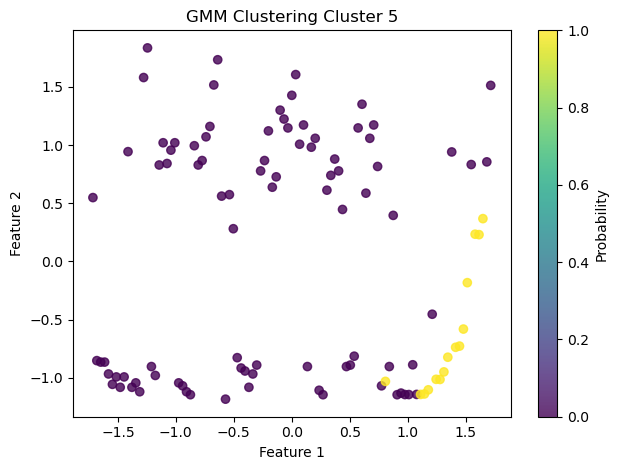

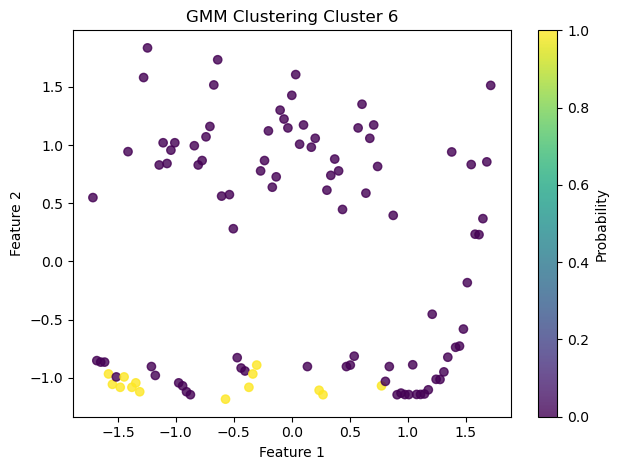

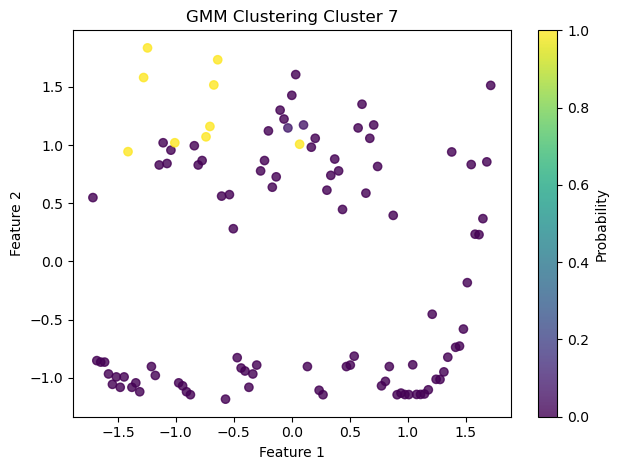

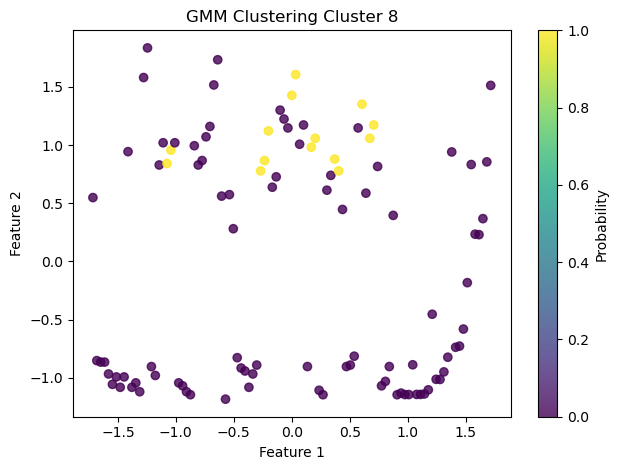

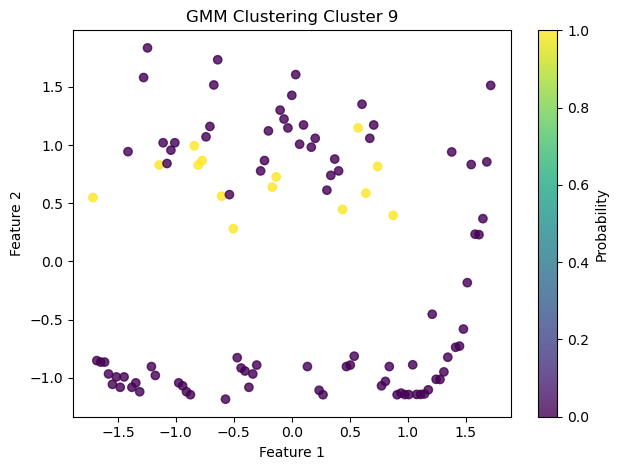

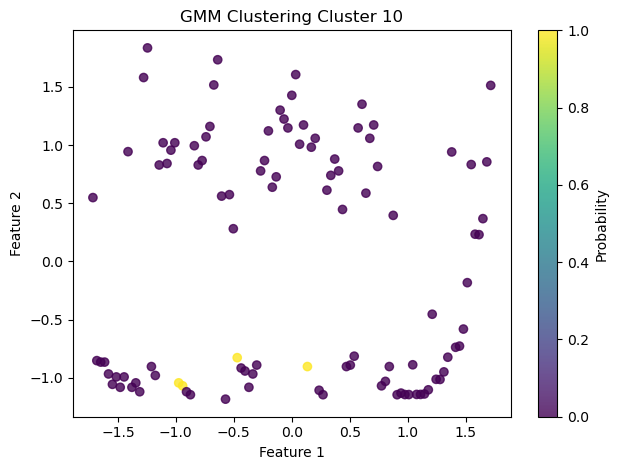

In [10]:
kmeansGMM(scaled_data, 5, 10)

## Energy
___

In [11]:
df = pd.read_excel('./datas/energy.xlsx')
X = df.drop(columns=['Y1', 'Y2'])

scaled_data = scaler.fit_transform(X)

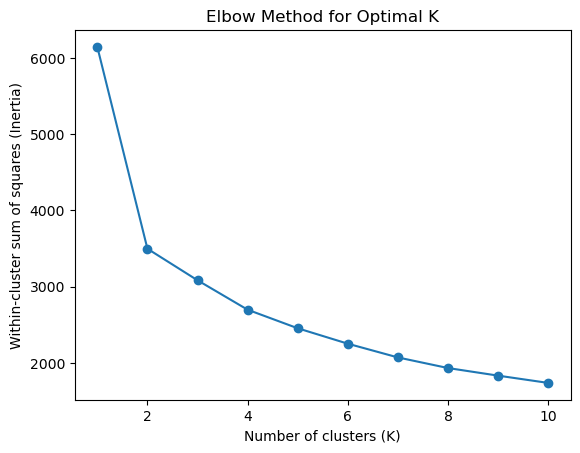

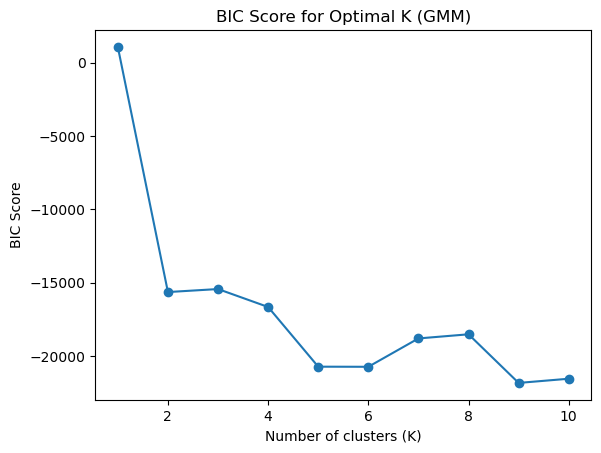

Optimal K for Kmeans: 2
Optimal K for GMM: 5


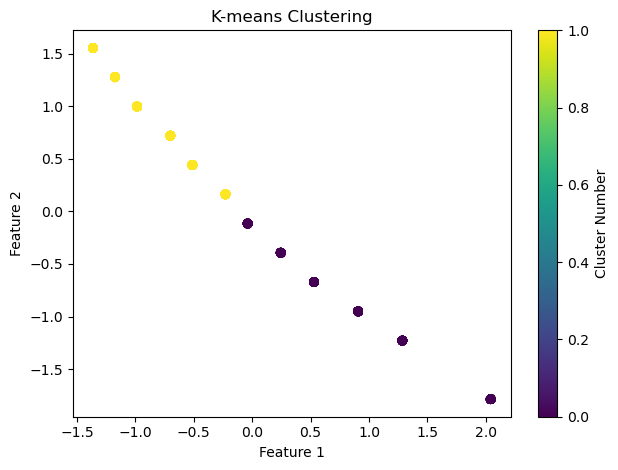

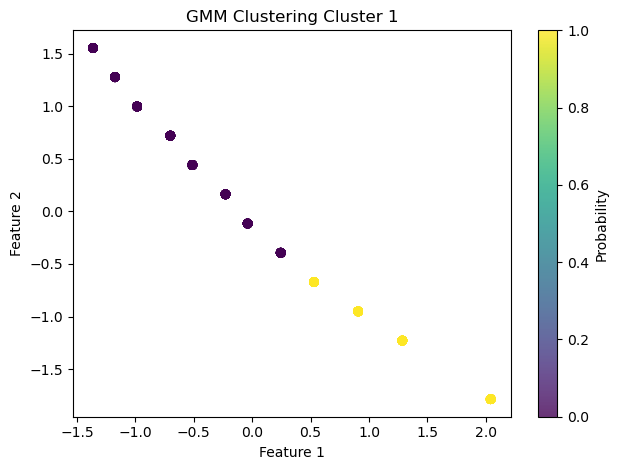

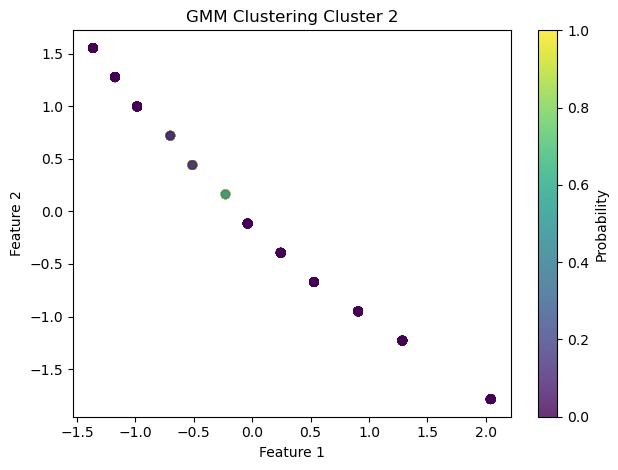

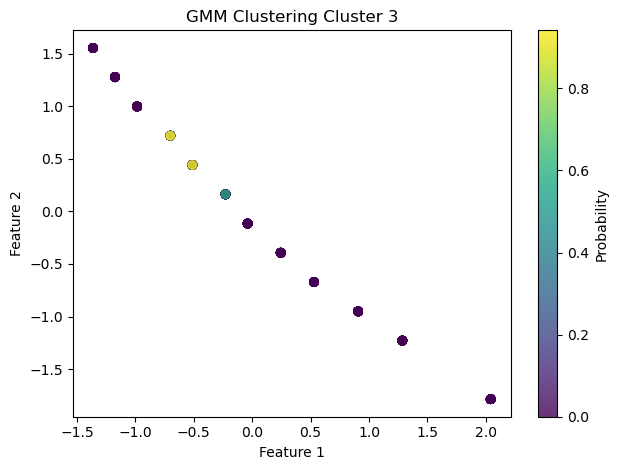

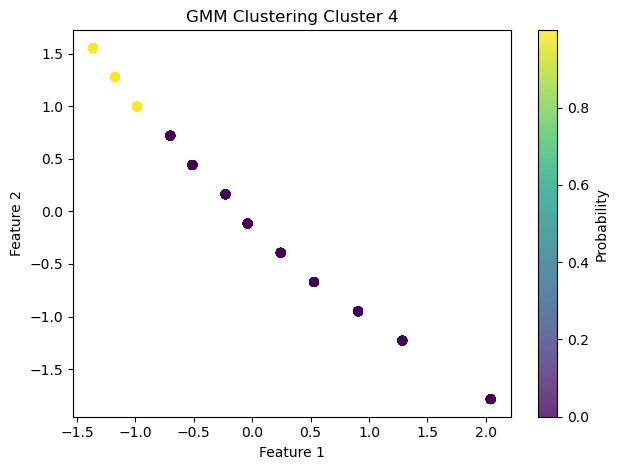

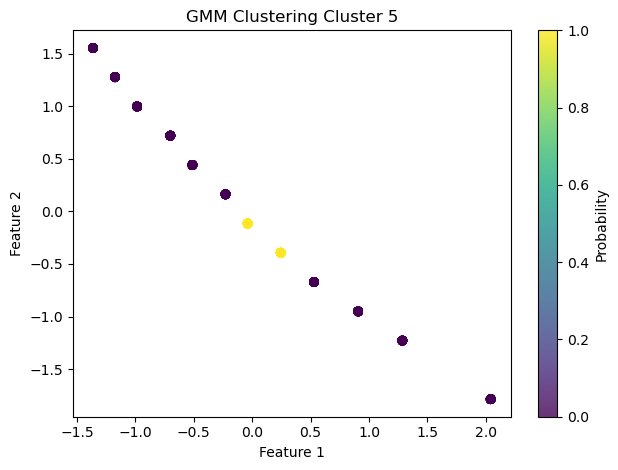

In [12]:
kmeansGMM(scaled_data, 2, 5)

## Servo 
___

In [13]:
df = pd.read_csv('./datas/servo.data', header=None, names=['motor', 'screw', 'pgain', 'vgain', 'class'])

df['motor'] = df['motor'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})
df['screw'] = df['screw'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})

X = df.drop(columns='class')
scaled_data = scaler.fit_transform(X)

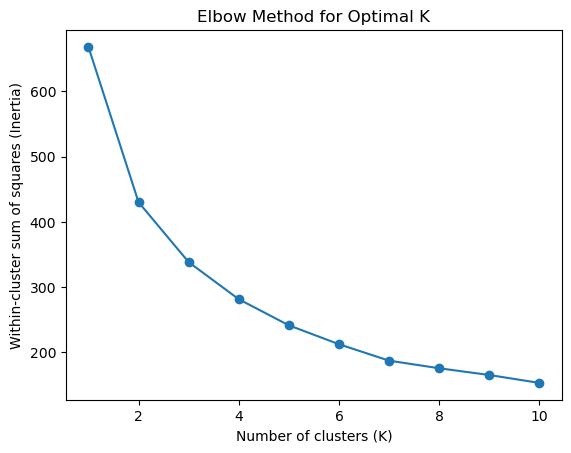

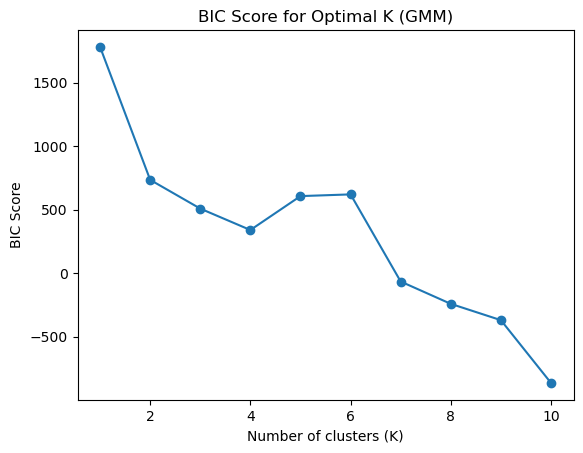

Optimal K for Kmeans: 4
Optimal K for GMM: 4


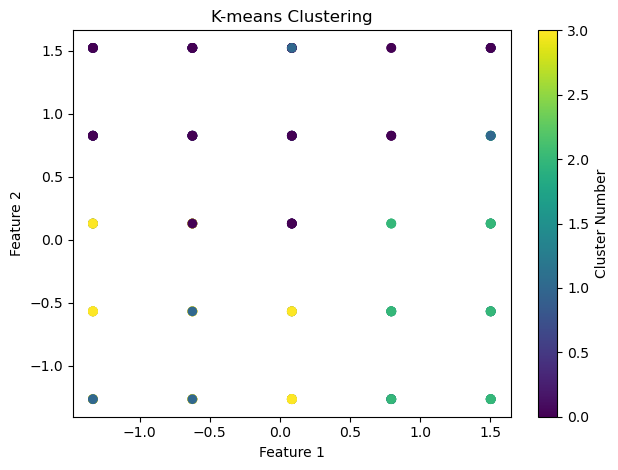

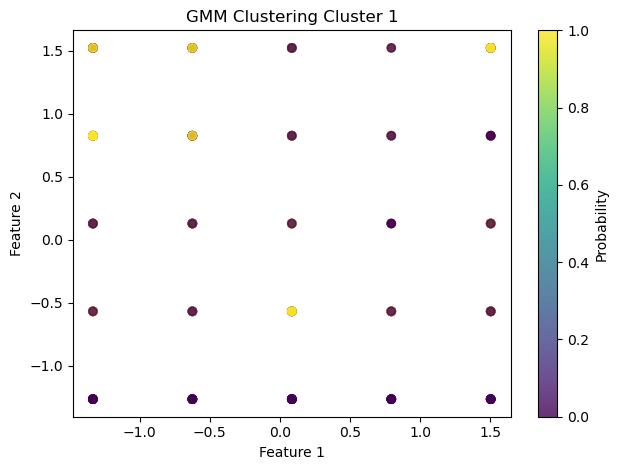

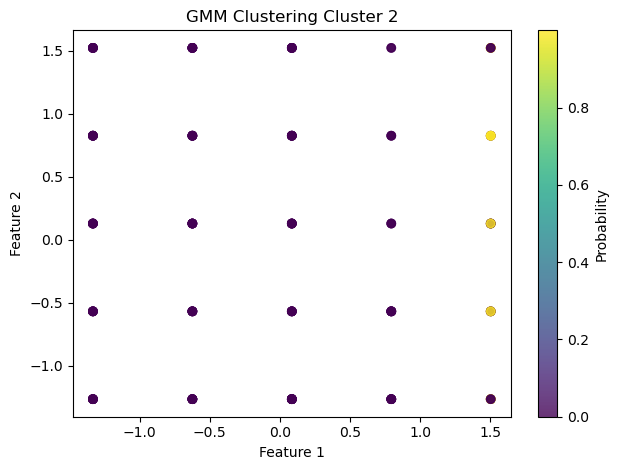

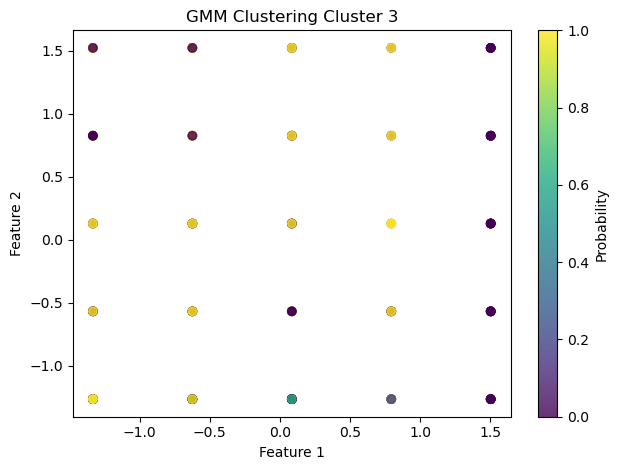

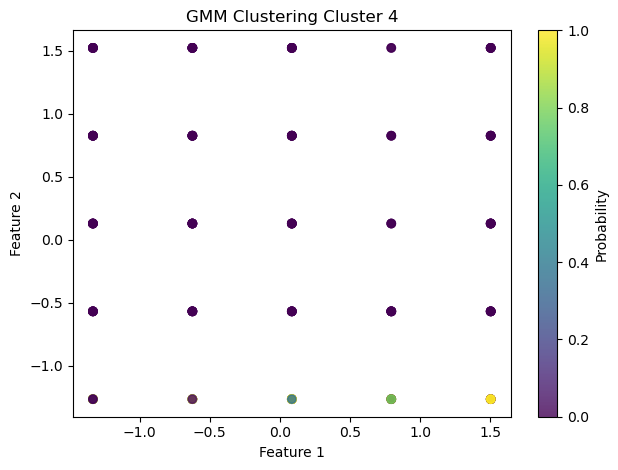

In [14]:
kmeansGMM(scaled_data, 4, 4)

## SML
___

In [15]:
file_path1 = './datas/sml/NEW-DATA-1.T15.txt'
file_path2 = './datas/sml/NEW-DATA-2.T15.txt'

data_rows = []
with open(file_path1, 'r') as file:
    for line in file:
        if not line.startswith('#'):
            parts = line.split()
            timestamp = pd.to_datetime(f"{parts[0]} {parts[1]}").timestamp()
            features = [float(x) for x in parts[2:]]
            row = [timestamp] + features
            data_rows.append(row)
            
with open(file_path2, 'r') as file:
    for line in file:
        if not line.startswith('#'):
            parts = line.split()
            timestamp = pd.to_datetime(f"{parts[0]} {parts[1]}").timestamp()
            features = [float(x) for x in parts[2:]]
            row = [timestamp] + features
            data_rows.append(row)

columns = ['Timestamp'] + [f'Feature_{i}' for i in range(1, 23)]
df = pd.DataFrame(data_rows, columns=columns)
scaled_data = scaler.fit_transform(df)

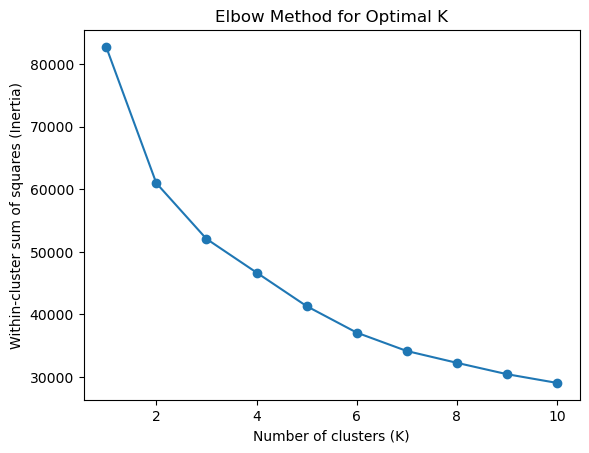

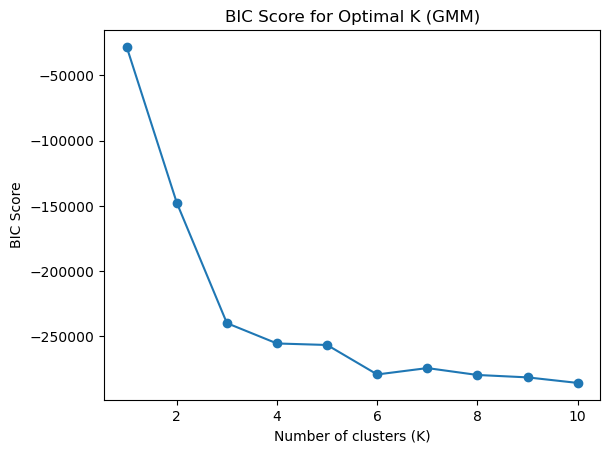

Optimal K for Kmeans: 7
Optimal K for GMM: 6


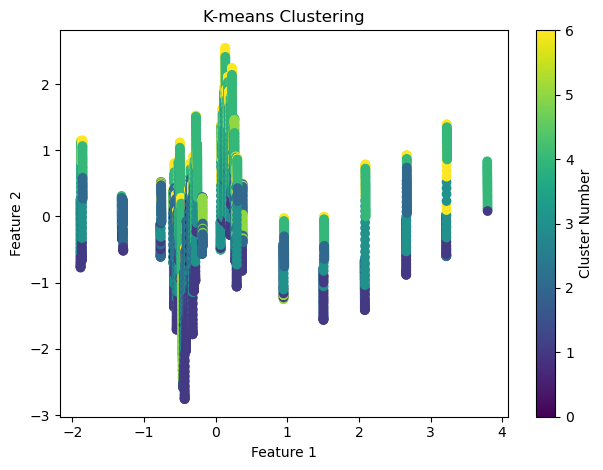

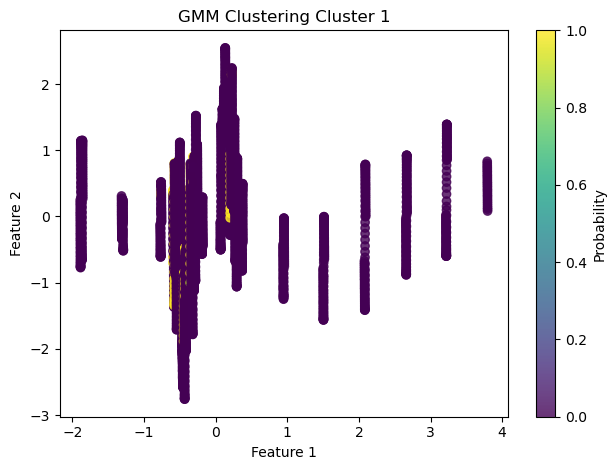

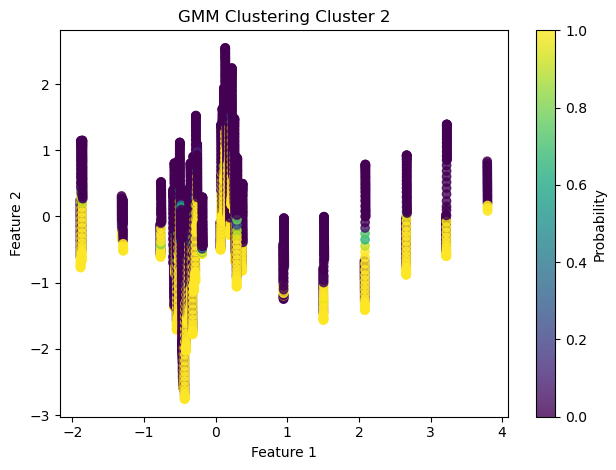

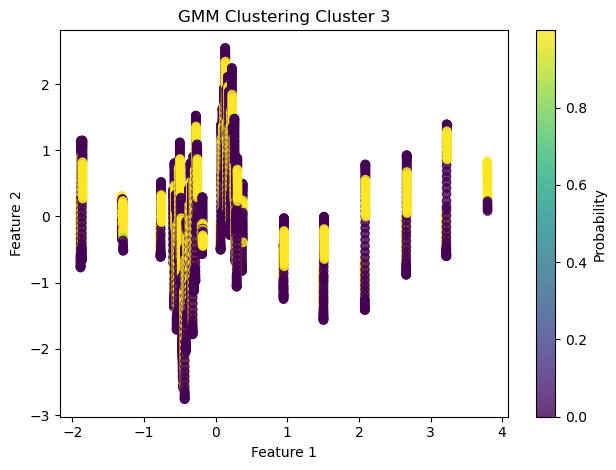

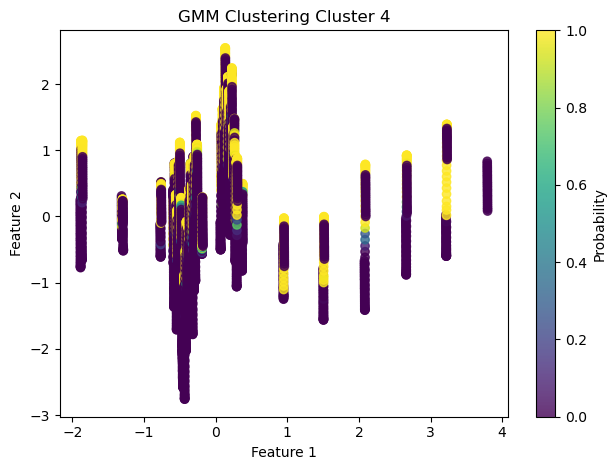

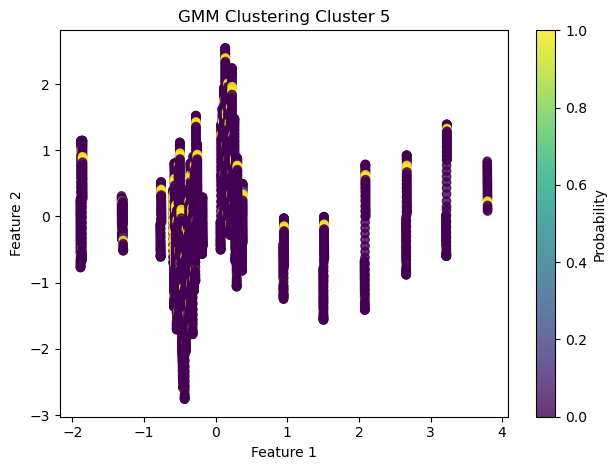

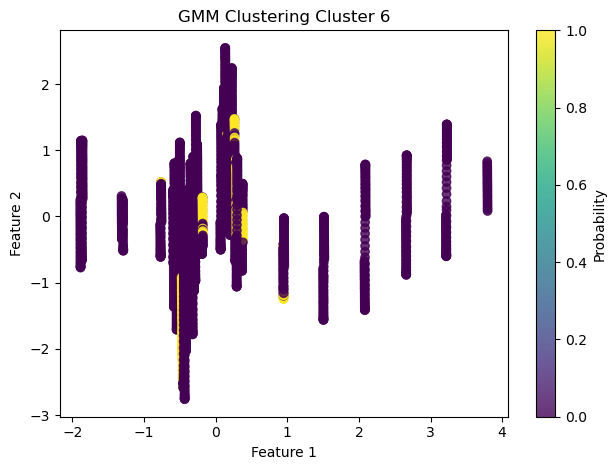

In [16]:
kmeansGMM(scaled_data, 7, 6)

## Yacht
___

In [17]:
columns = ['Longitudinal position', 'Prismatic coefficient', 
                'Length-displacement ratio', 'Beam-draught ratio', 
                'Length-beam ratio', 'Froude number', 
                'Residuary resistance']

df = pd.read_csv('./datas/yacht.data', names=columns, delim_whitespace=True)
scaled_data = scaler.fit_transform(df)

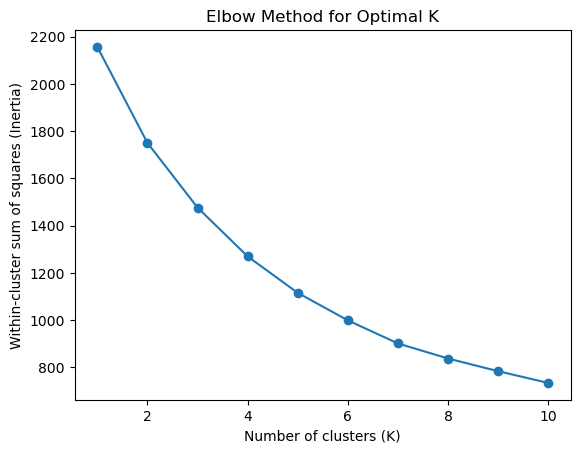

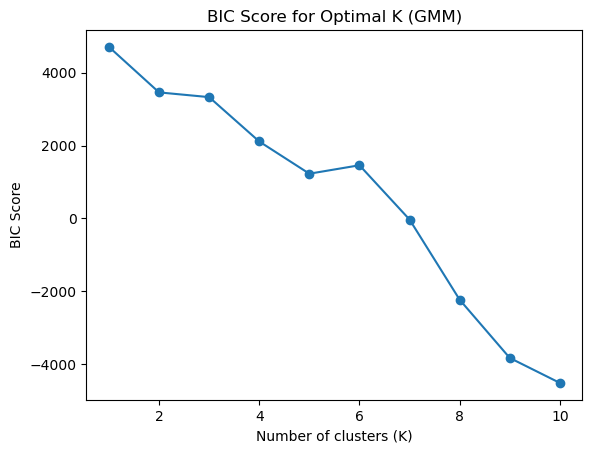

Optimal K for Kmeans: 5
Optimal K for GMM: 8


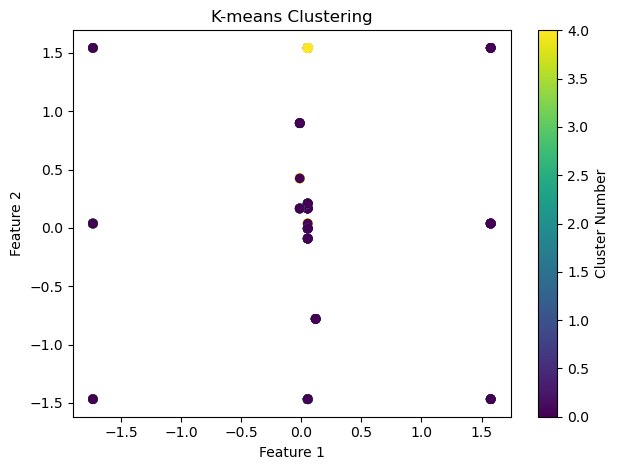

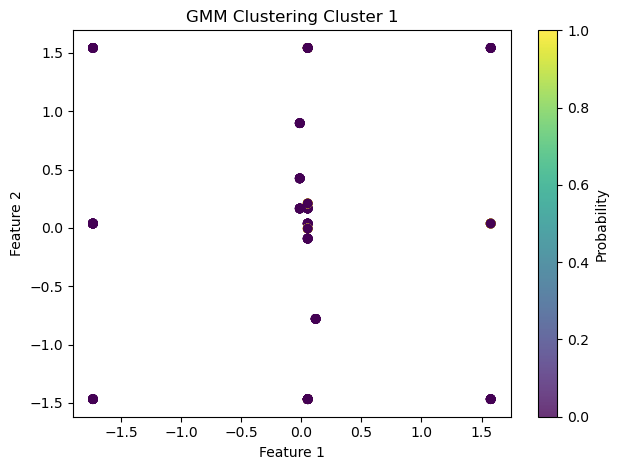

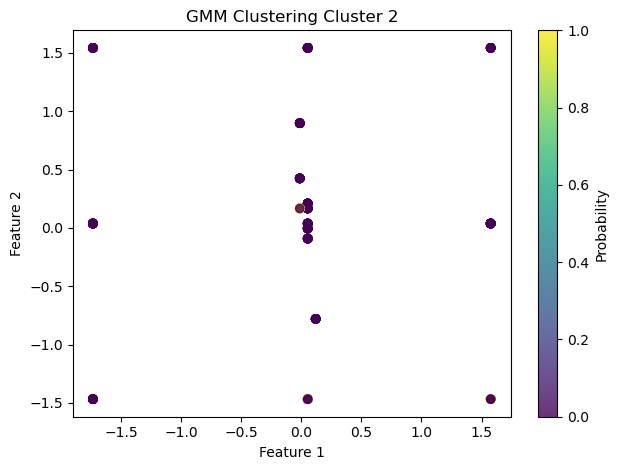

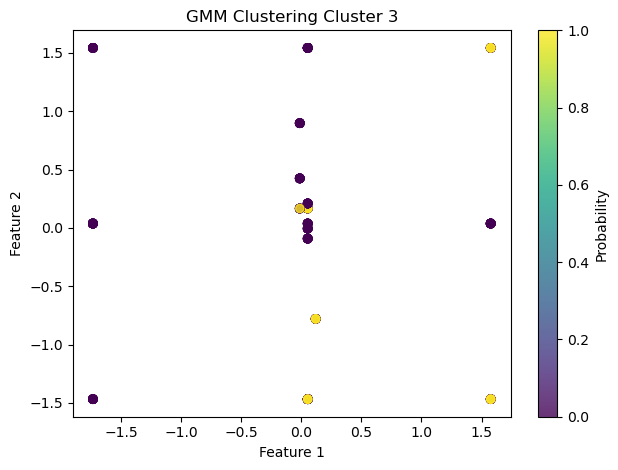

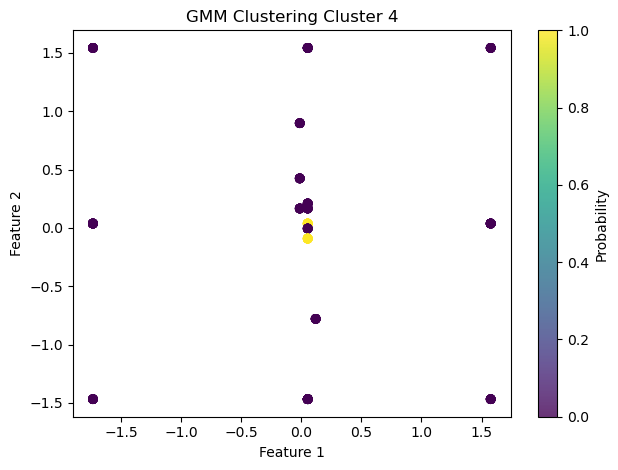

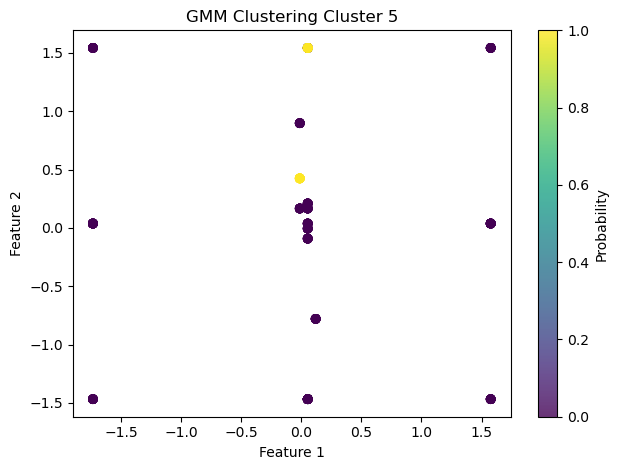

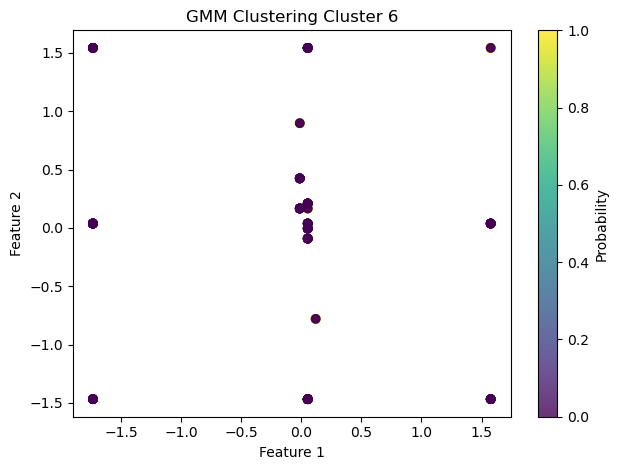

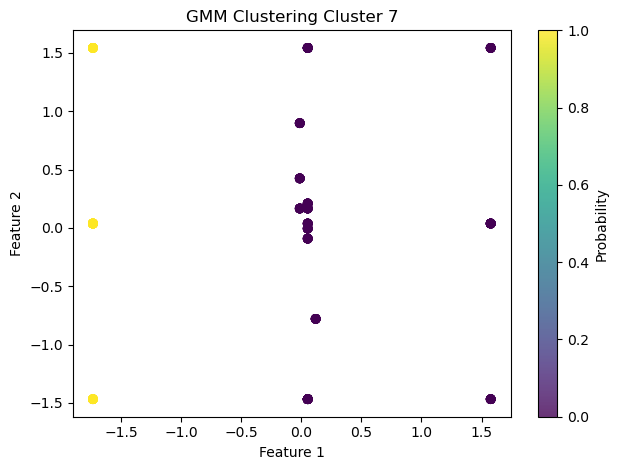

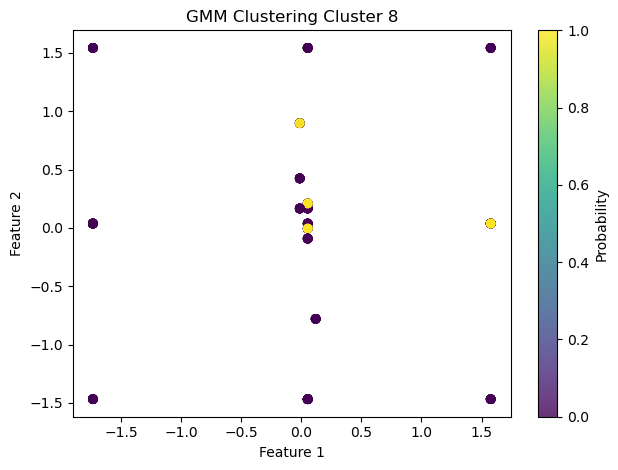

In [18]:
kmeansGMM(scaled_data, 5, 8)

## Auto MPG
___

In [19]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('./datas/auto-mpg.data', delim_whitespace=True, names=columns)
df.dropna(inplace=True)
df = clean_data(df)

numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                   'weight', 'acceleration', 'model year', 'origin']
X_numeric = df[numeric_columns]

scaled_numeric_data = scaler.fit_transform(X_numeric)

encoded_car_names = encoder.fit_transform(df[['car name']]).toarray()

scaledDataAuto = np.concatenate([scaled_numeric_data, encoded_car_names], axis=1)

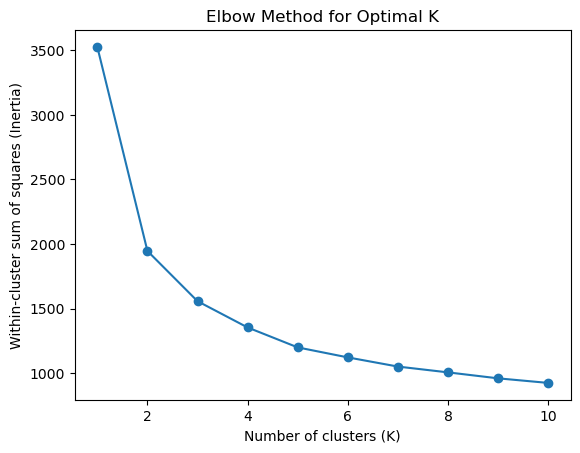

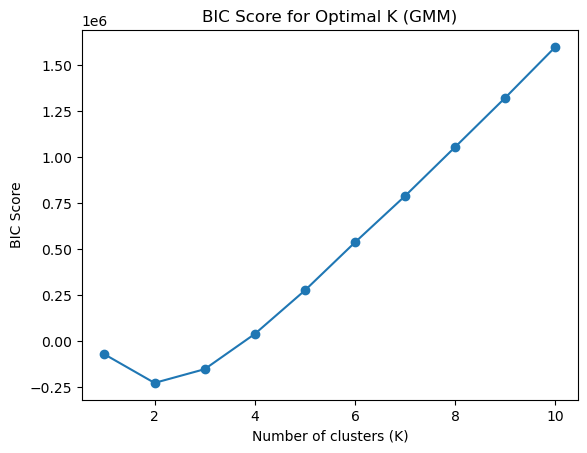

Optimal K for Kmeans: 5
Optimal K for GMM: 2


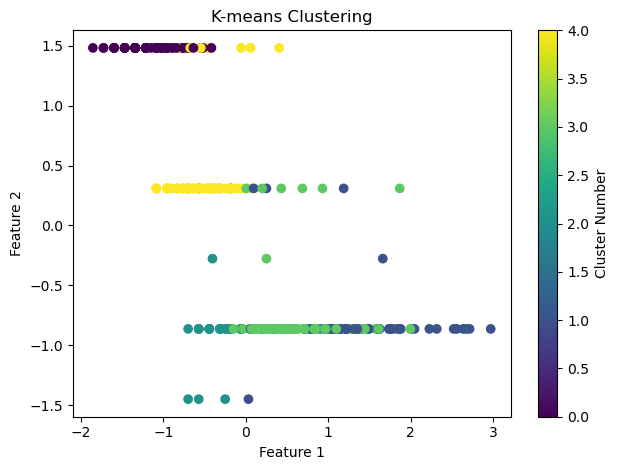

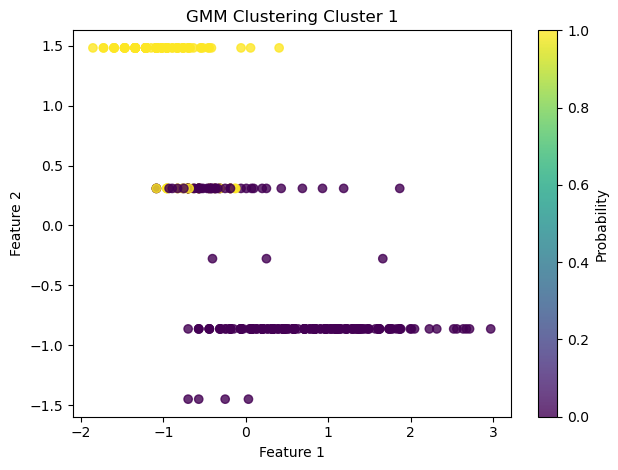

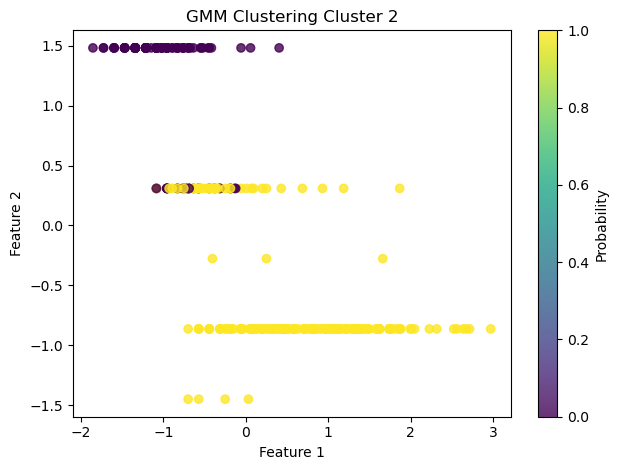

In [20]:
kmeansGMM(scaledDataAuto, 5, 2)

## Forest
___

In [21]:
df = pd.read_csv('./datas/forestfires.csv')

month_to_numeric = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_to_numeric = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

df['month'] = df['month'].map(month_to_numeric)
df['day'] = df['day'].map(day_to_numeric)

df = clean_data(df)
scaled_data = scaler.fit_transform(df)

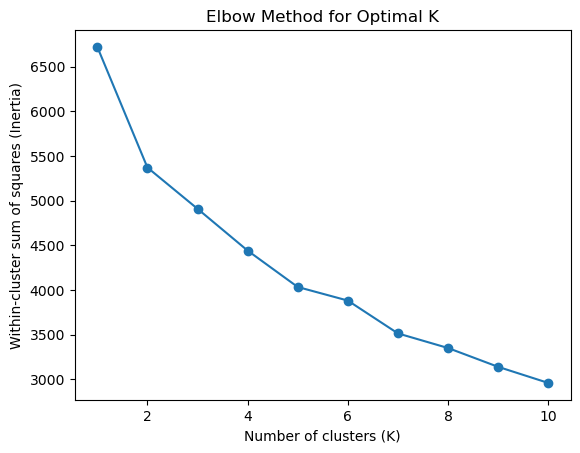

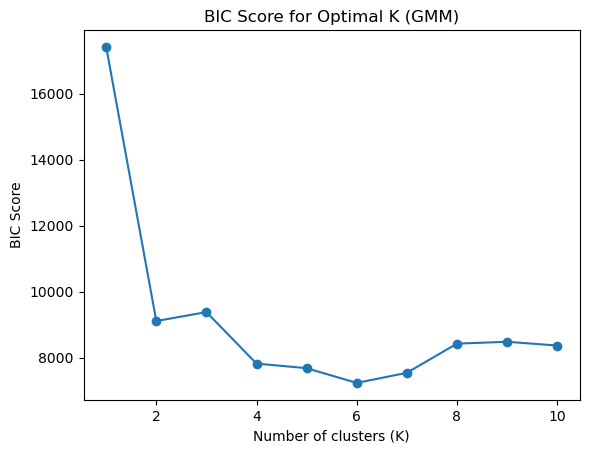

Optimal K for Kmeans: 5
Optimal K for GMM: 6


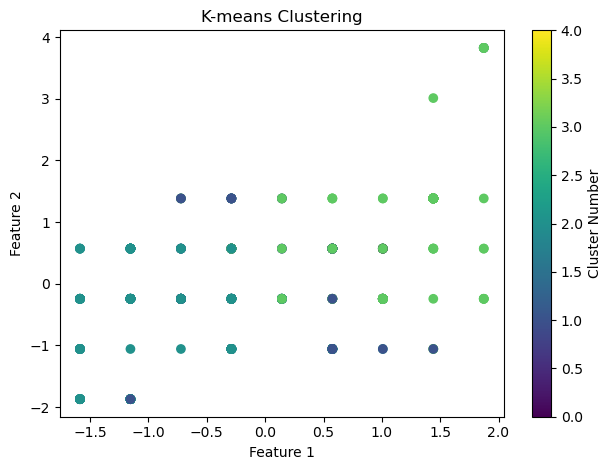

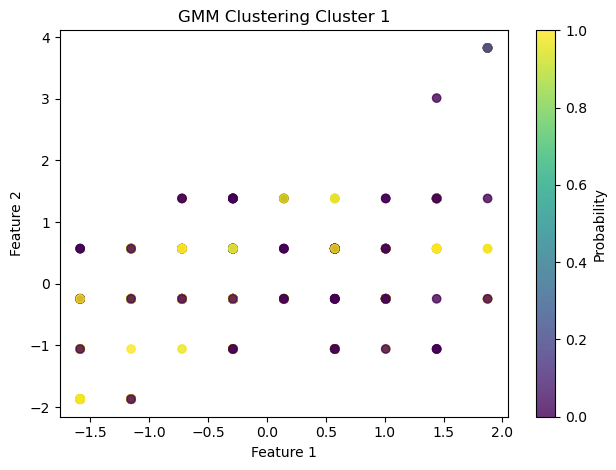

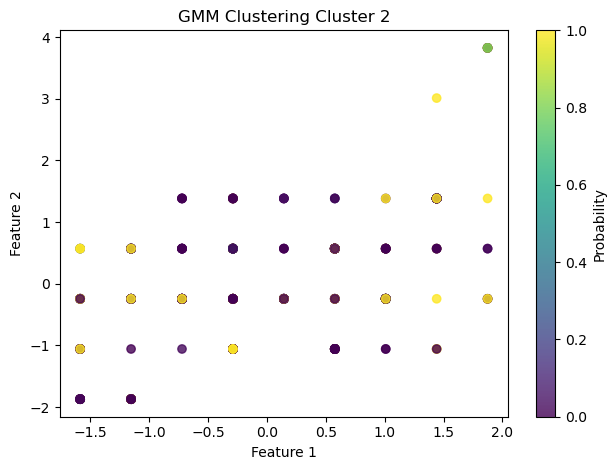

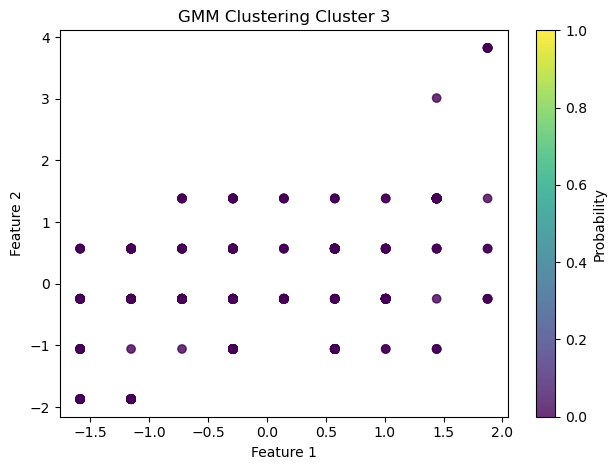

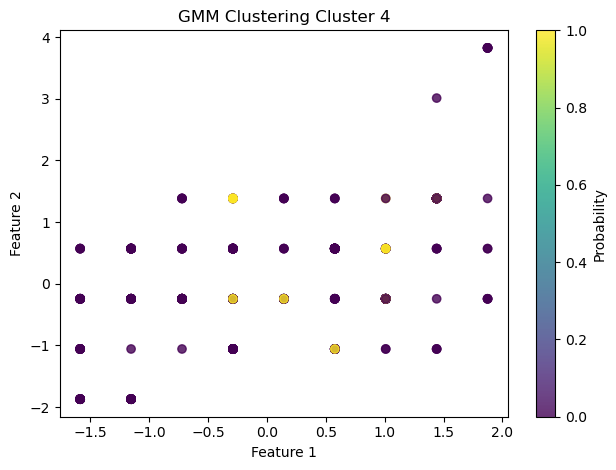

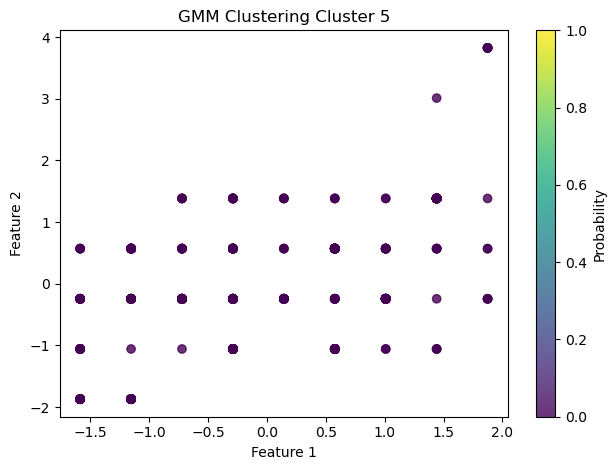

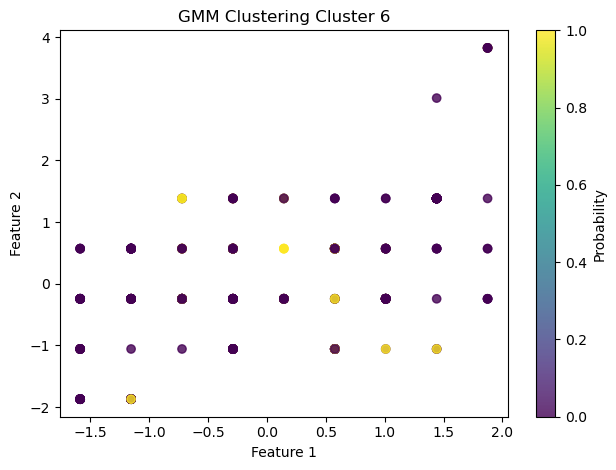

In [22]:
kmeansGMM(scaled_data, 5, 6)

## SkillCraft
___

In [23]:
df = pd.read_csv('./datas/skillcraft.csv')

df = clean_data(df)
scaled_data = scaler.fit_transform(df)

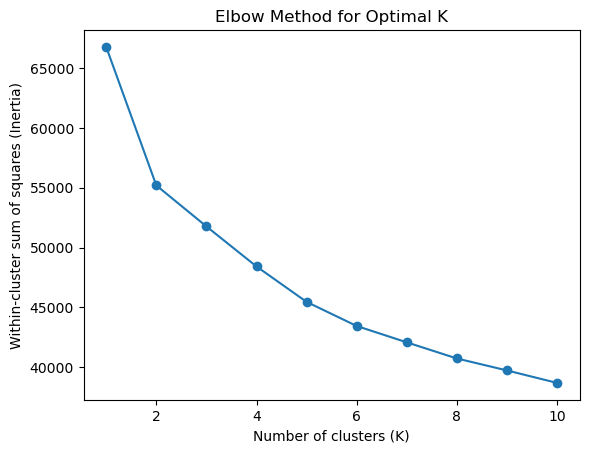

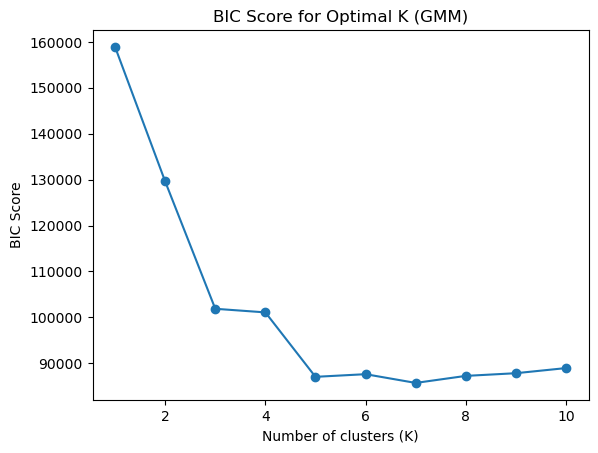

Optimal K for Kmeans: 7
Optimal K for GMM: 5


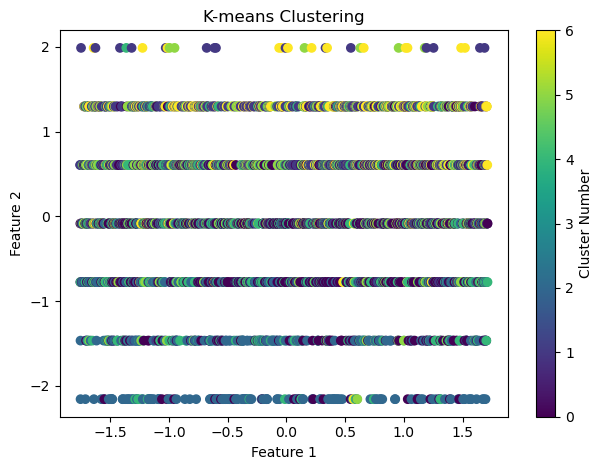

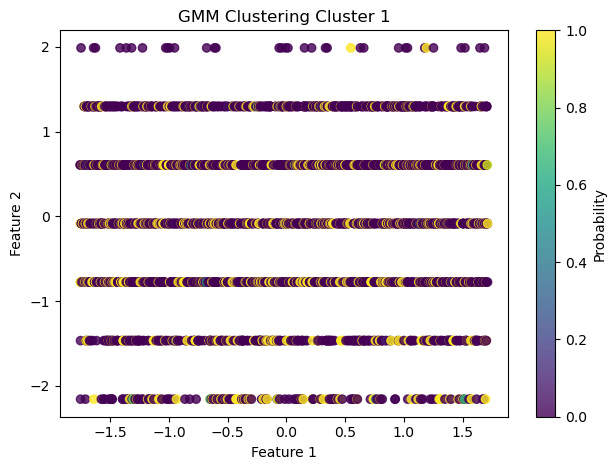

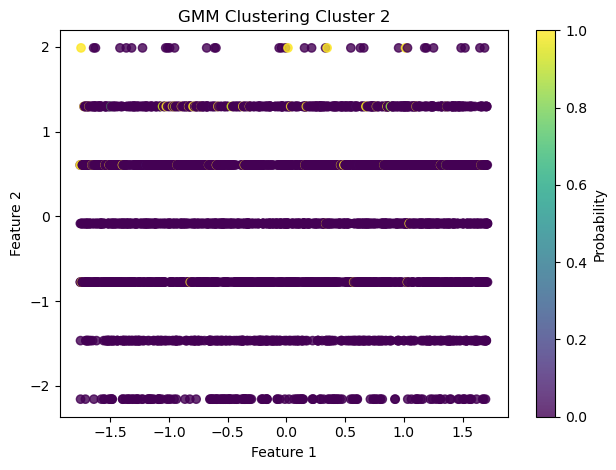

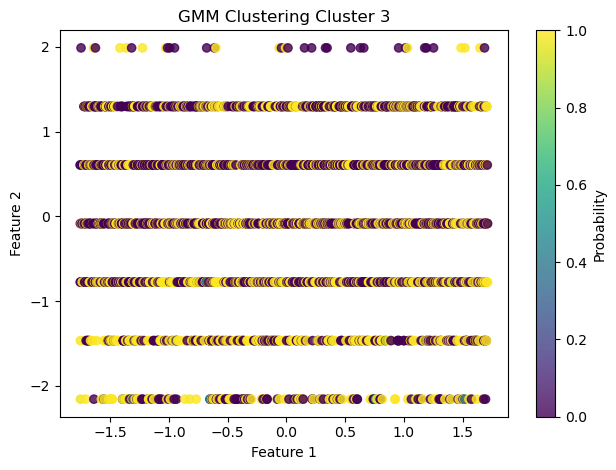

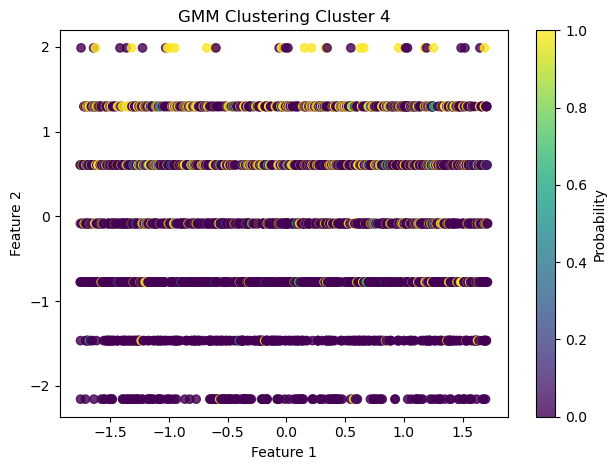

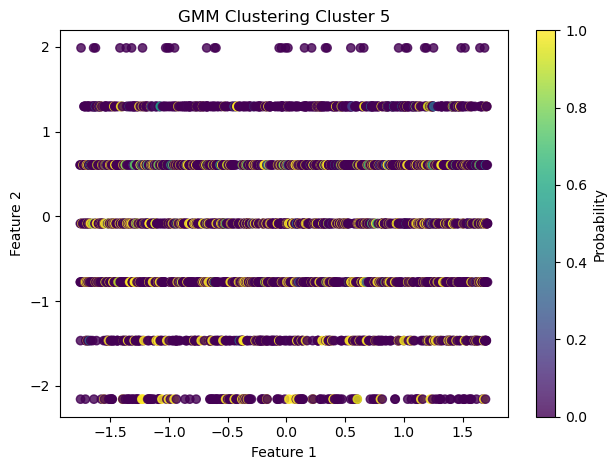

In [24]:
kmeansGMM(scaled_data, 7, 5)

## California Housing 
___

In [25]:
from sklearn.datasets import fetch_california_housing

In [26]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

scaled_data = scaler.fit_transform(df)


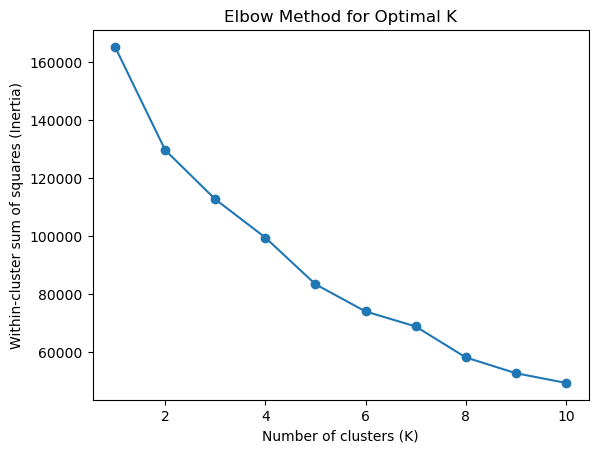

In [ ]:
kmeansGMM(scaled_data, 6, 4)

In [ ]:
#I am the one who did it-N K Sathvik, 210123041